# California House Prices
Predict California sales prices

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

## 读取数据

In [11]:
# 数据集位置
traincsv = './train.csv'
testcsv = './test.csv'

In [12]:
train_data = pd.read_csv(traincsv)
test_data = pd.read_csv(testcsv)

In [13]:
print(train_data.shape)
print(test_data.shape)
train_data.head()
# train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]] # 这个和上面函数效果类似

(47439, 41)
(31626, 40)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [14]:
train_data.iloc[0 , :]

Id                                                                             0
Address                                                              540 Pine Ln
Sold Price                                                             3825000.0
Summary                        540 Pine Ln, Los Altos, CA 94022 is a single f...
Type                                                                SingleFamily
Year built                                                                1969.0
Heating                             Heating - 2+ Zones, Central Forced Air - Gas
Cooling                          Multi-Zone, Central AC, Whole House / Attic Fan
Parking                                       Garage, Garage - Attached, Covered
Lot                                                                          1.0
Bedrooms                       Ground Floor Bedroom, Master Bedroom on Ground...
Bathrooms                                                                    0.0
Full bathrooms              

In [15]:
test_data.iloc[0 , :]

Id                                                                         47439
Address                                                      3034 N Coolidge Ave
Summary                        Live within steps to the scenic views on the L...
Type                                                                SingleFamily
Year built                                                                2020.0
Heating                                                                  Central
Cooling                                                              Central Air
Parking                                                         Tandem Uncovered
Lot                                                                        940.0
Bedrooms                                                                       2
Bathrooms                                                                    4.0
Full bathrooms                                                               3.0
Total interior livable area 

In [16]:
# 由上面检视数据构成可以发现，需要预测的Sold Price在train_data的第三列
# Id,Adress,Summary全部主动舍弃
all_features = pd.concat((train_data.iloc[:, 4:], test_data.iloc[:, 3:]))

In [17]:
import matplotlib.pyplot as plt

(array([2.4737e+04, 1.5009e+04, 4.4460e+03, 1.6140e+03, 6.7800e+02,
        2.8300e+02, 1.6200e+02, 1.2500e+02, 7.8000e+01, 5.3000e+01,
        3.1000e+01, 3.5000e+01, 2.4000e+01, 1.1000e+01, 1.3000e+01,
        1.2000e+01, 1.5000e+01, 1.2000e+01, 9.0000e+00, 1.1000e+01,
        5.0000e+00, 8.0000e+00, 6.0000e+00, 5.0000e+00, 9.0000e+00,
        3.0000e+00, 7.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 9.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

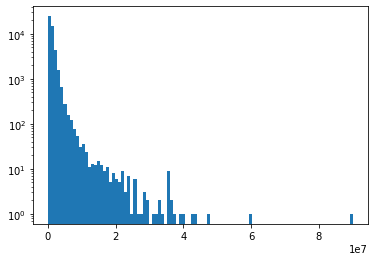

In [18]:
plt.hist(train_data['Sold Price'], log=True, bins = 100)

Sold Price                 1.000000
Bathrooms                  0.516208
Full bathrooms             0.544245
Elementary School Score    0.275555
Middle School Score        0.244285
High School Score          0.191616
Tax assessed value         0.743233
Annual tax amount          0.746221
Listed Price               0.612651
Last Sold Price            0.706779
Name: Sold Price, dtype: float64


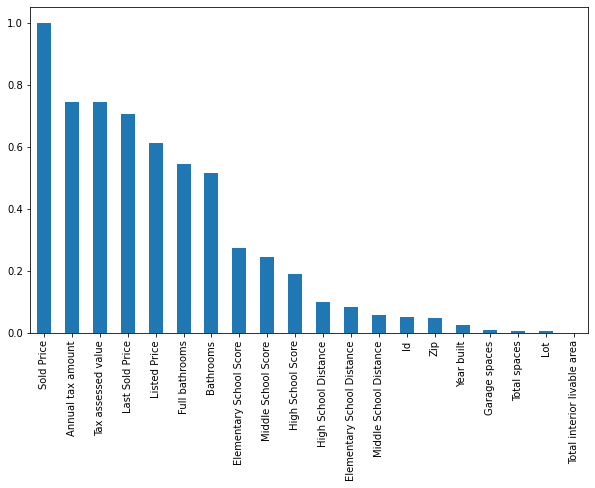

In [19]:
fig = plt.figure(figsize=(10,6))
abs(train_data.corr()['Sold Price']).sort_values(ascending=False).plot.bar()
corr_SP = abs(train_data.corr()['Sold Price'])
print(corr_SP[corr_SP>0.19])

## 数据预处理

In [20]:
all_features = all_features.loc[:, [
    'Bathrooms',
    'Full bathrooms',
    'Tax assessed value',
    'Annual tax amount',
    'Listed Price',
    'Last Sold Price']
]
all_features.shape[1]

6

实际上当选出指定6个强相关项之后，下面两步就并不重要了

In [21]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [22]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(79065, 6)

In [23]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32, device = 'cuda')
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32, device = 'cuda')
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1, 1), dtype=torch.float32, device = 'cuda')
# 取log使得'Sold Price'分布更接近正态分布
# 取消掉下方注释要将上行', device = 'cuda''一同去掉
# train_labels = np.log1p(train_labels).to('cuda') 
# can't convert cuda:0 device type tensor to numpy.
# Use Tensor.cpu() to copy the tensor to host memory first.

In [24]:
# 要注意Submissions are evaluated on Root-Mean-Squared-Error (RMSE)
loss = nn.MSELoss()
in_features = train_features.shape[1] #in_features = 6

In [25]:
def get_net():
    net = nn.Sequential(
        nn.Linear(in_features,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,1)
    )
    return net

In [26]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [27]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [28]:
def train_SGD(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是SGD优化算法
    optimizer = torch.optim.SGD(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

## K折交叉验证

In [29]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [30]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net().to('cuda')
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

折1，训练log rmse0.628566, 验证log rmse0.580663
折2，训练log rmse0.314756, 验证log rmse0.343092
2-折验证: 平均训练log rmse: 0.471661, 平均验证log rmse: 0.461878


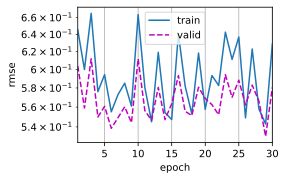

In [40]:
# k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.007, 0.00005, 64 #5
# k, num_epochs, lr, weight_decay, batch_size = 2, 120, 0.0004, 0.000001, 1024 #4
k, num_epochs, lr, weight_decay, batch_size = 2, 30, 0.2, 0, 1024 #4
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [33]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net().to('cuda')
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().cpu().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['Sold Price'] = pd.Series(preds.reshape(1, -1)[0])
    # submission = pd.concat([test_data['Id'], np.expm1(test_data['Sold Price'])], axis=1) # 对应于train_labels = np.log1p(train_labels).to('cuda') 
    submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：0.360830


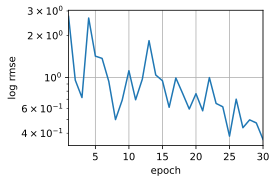

In [39]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [ ]:
print(get_net())
# print('+-'*20)
# for name, parameters in get_net().named_parameters():
#     print(name, ':', parameters.size())

Sequential(
  (0): Linear(in_features=6, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
0.weight : torch.Size([64, 6])
0.bias : torch.Size([64])
2.weight : torch.Size([64, 64])
2.bias : torch.Size([64])
4.weight : torch.Size([16, 64])
4.bias : torch.Size([16])
6.weight : torch.Size([1, 16])
6.bias : torch.Size([1])
